# Esercizio 20 news groups
Fare text classification del dataset di [sklearn 20newsgroups](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset), cioè data la stringa della news in input, predire il target corrispondente.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import spacy
# from sklearn.neural_network import MLPClassifier
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

RANDOM_SEED = 176

In [2]:
X_train, y_train = fetch_20newsgroups(subset="train", return_X_y=True)
X_test, y_test = fetch_20newsgroups(subset="test", return_X_y=True)

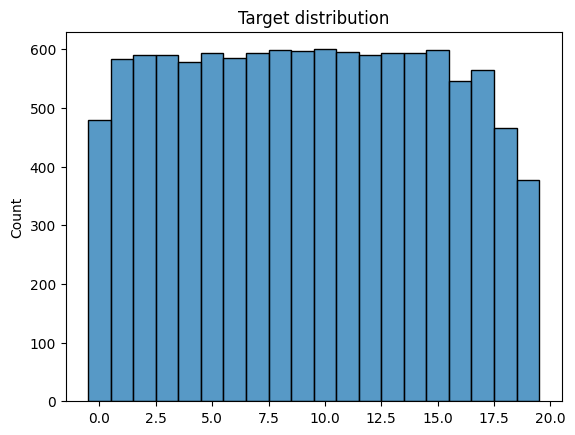

In [3]:
# np.concatenate((y_train,y_test))
sns.histplot(x=y_train,bins=20,discrete=True)
plt.title("Target distribution")
plt.show()

Balanced problem

In [4]:
#utils
# nlp = spacy.load('en_core_web_sm')
nltk.download("stopwords")
en_stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def text_cleaning(sentence):
    """
    Clean a text string
    """
    #lowercase
    sentence=sentence.lower()
    #remove punctuation
    for c in string.punctuation:
        sentence = sentence.replace(c,"")
    #lemming
#     doc = nlp(sentence)
#     sentence = " ".join(token.lemma_ for token in doc)
    #remove stopwords
    sentence = " ".join(word for word in sentence.split()\
                        if word not in en_stopwords)
    #numbers
    sentence = re.sub(r"\d", "",sentence)
    #trailing spaces
    sentence = re.sub(r" +", " ",sentence)
    return sentence

In [6]:
X_train = [text_cleaning(sentence) for sentence in X_train]
X_test = [text_cleaning(sentence) for sentence in X_test]

In [7]:
vectorizer = TfidfVectorizer(min_df=0.05, max_df=0.9)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [8]:
print(X_train.shape)
print(X_test.shape)

(11314, 252)
(7532, 252)


In [9]:
# model = MLPClassifier(hidden_layer_sizes=(1024,64),
#                       activation='relu',
#                       learning_rate='invscaling',
#                       verbose=True,
#                       early_stopping=True,
#                       max_iter=100,
#                       random_state=RANDOM_SEED)

# model.fit(X_train,y_train)

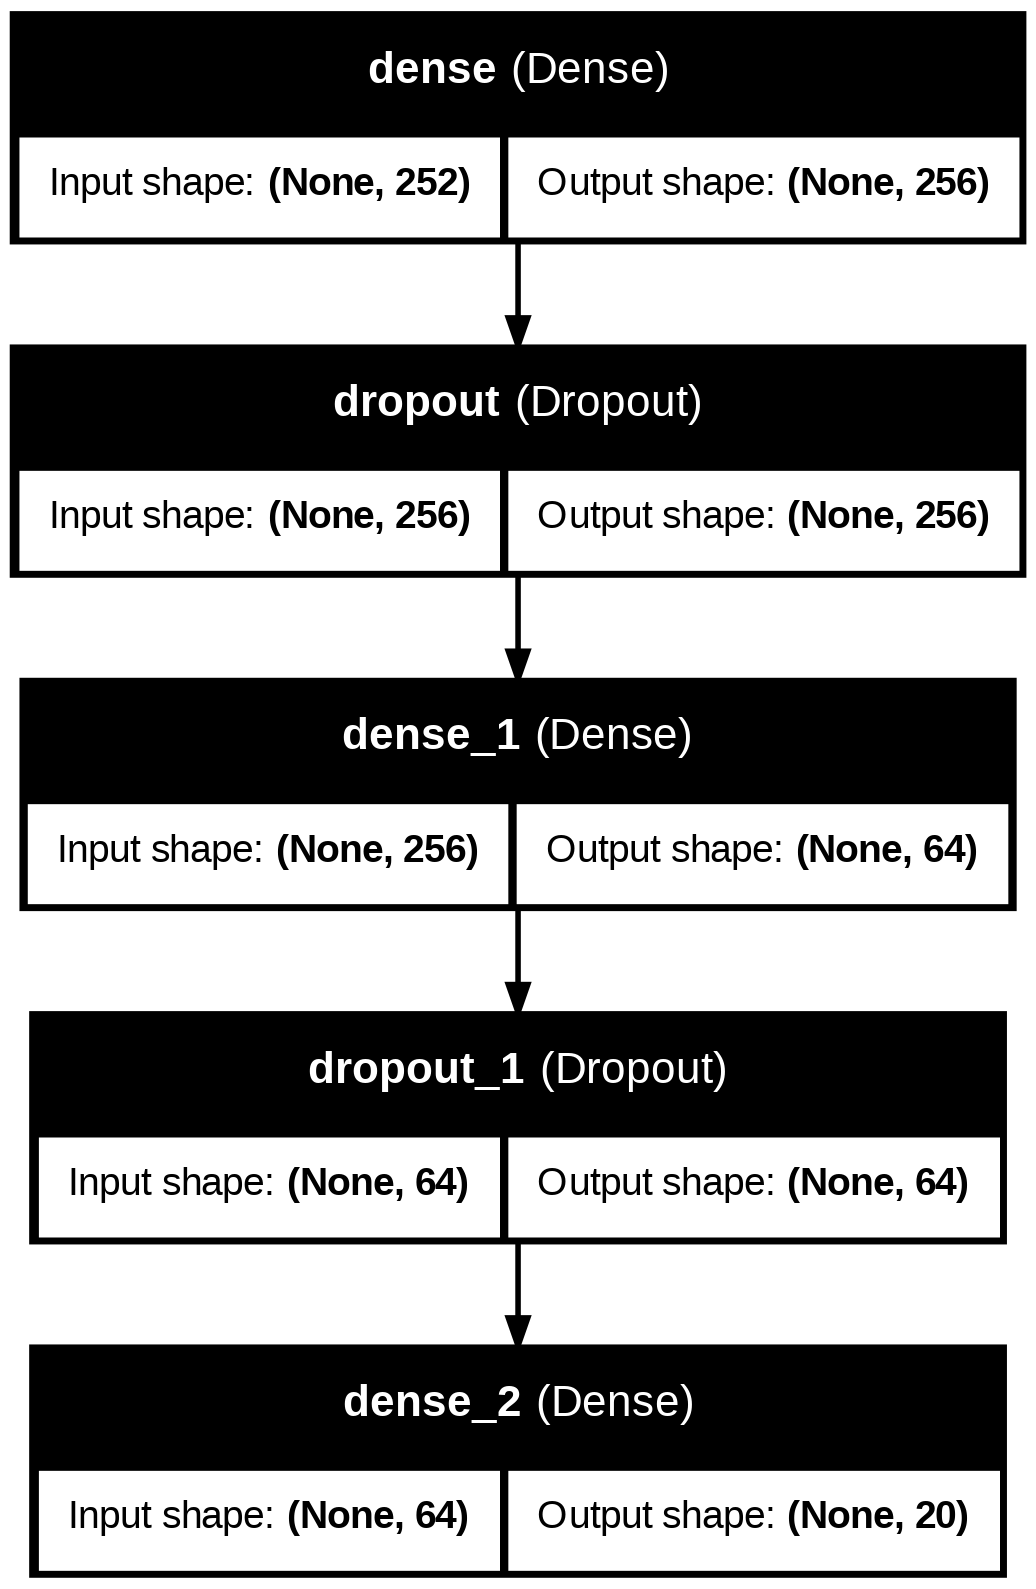

In [10]:
clear_session()

model = Sequential()
model.add(InputLayer(shape=(len(vectorizer.vocabulary_),)))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(20, activation='softmax'))

plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [11]:
model.compile(optimizer='adam',loss = "sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          64,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,516 (322.33 KB)

 Trainable params: 82,516 (322.33 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
callback = EarlyStopping(verbose=1,monitor='val_loss',restore_best_weights=True, patience=5)
history = model.fit(X_train, y_train, epochs=100, callbacks=[callback], batch_size=32, validation_split=0.25)

Epoch 1/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1023 - loss: 2.9286 - val_accuracy: 0.2987 - val_loss: 2.4249
Epoch 2/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2584 - loss: 2.3914 - val_accuracy: 0.3528 - val_loss: 2.1330
Epoch 3/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3292 - loss: 2.1335 - val_accuracy: 0.3719 - val_loss: 2.0193
Epoch 4/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3752 - loss: 1.9770 - val_accuracy: 0.3832 - val_loss: 1.9625
Epoch 5/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3882 - loss: 1.9450 - val_accuracy: 0.4069 - val_loss: 1.9301
Epoch 6/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4220 - loss: 1.8364 - val_accuracy: 0.4122 - val_loss: 1.8976
Epoch 7/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4421 - loss: 1.7797 - val_accuracy: 0.4182 - val_loss: 1.8729
Epoch 8/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4503 - loss: 1.7595 - val_accu

In [15]:
def plot_learning_curve(history):
    plt.figure(figsize=(16,10))
    plt.subplot(2,1,1)
    plt.plot(history.history["loss"], label= "train")
    plt.plot(history.history["val_loss"], label = "valid")
    plt.xlabel("Epoch")
    plt.legend()
    plt.title("Loss")
    plt.subplot(2,1,2)
    # plt.plot(np.mean(history.history["accuracy"],axis=1), label="train")
    # plt.plot(np.mean(history.history["val_accuracy"],axis=1), label = "valid")
    plt.plot(history.history["accuracy"], label="train")
    plt.plot(history.history["val_accuracy"], label = "valid")
    plt.xlabel("Epoch")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

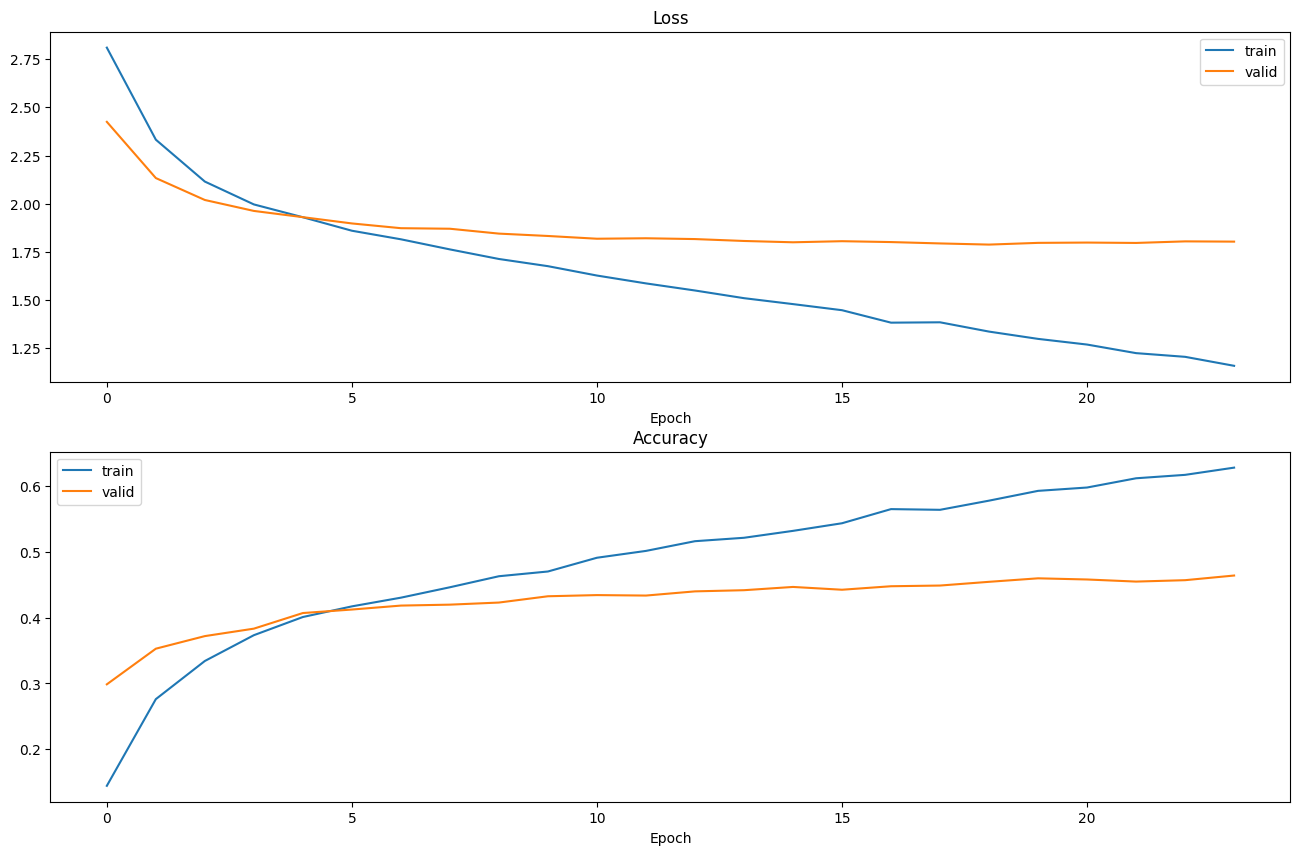

In [16]:
plot_learning_curve(history)

In [26]:
from sklearn.metrics import classification_report

# y_pred = (model.predict(X_test) > 0.5).astype(int)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1) # Convert probabilities to class labels
print(classification_report(y_test, y_pred))

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.27      0.37      0.31       319
           1       0.29      0.34      0.31       389
           2       0.63      0.58      0.60       394
           3       0.33      0.30      0.32       392
           4       0.23      0.18      0.20       385
           5       0.33      0.41      0.37       395
           6       0.56      0.66      0.61       390
           7       0.27      0.16      0.20       396
           8       0.32      0.33      0.32       398
           9       0.31      0.30      0.31       397
          10       0.32      0.38      0.35       399
          11       0.42      0.46      0.44       396
          12       0.24      0.21      0.22       393
          13       0.28      0.23      0.25       396
          14       0.56      0.52      0.54       394
          15       0.44      0.49      0.47       398
          16       0.37      0.35      0

In [27]:
1/20

0.05